# 🌟 Car Price Prediction Project 🌟

## 📌 Project Overview
This project focuses on predicting car prices based on various features using a Machine Learning model. The model is built with XGBoost to ensure accurate predictions, incorporating hyperparameter tuning to enhance performance.

## 🛠️ Key Features
- **Machine Learning Model**: Implemented XGBoost along with hyperparameter tuning to achieve precise predictions.
- **Data Preprocessing**: Performed extensive data cleaning, feature engineering, and scaling to prepare the dataset for modeling.
- **Evaluation Metrics**: Utilized RMSE and R² score to evaluate model performance and ensure accurate predictions.
- **Visualizations**: Created various plots, including scatter plots and bar charts, to visualize the distribution of features and the model's performance.

## 📂 Dataset
The dataset includes various features related to cars, with the following key attributes:
- **Features**: Car name, Brand, Fuel Type, Transmission Type, and more.
- **Target Variable**: Selling Price

## 🚀 Conclusion
This project integrates advanced Machine Learning techniques with comprehensive data preprocessing to create an efficient car price prediction system. The model's performance is validated through rigorous evaluation metrics, and visualizations provide insights into the model's accuracy. The project demonstrates the effective application of Machine Learning to solve real-world regression problems.

## Load the dataset

In [8]:
import pandas as pd

# Load the dataset
car_data = pd.read_csv("car data.csv")

# Display basic info and first few rows
car_data.info(), car_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(None,
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Selling_type Transmission  Owner  
 0       Dealer       Manual      0  
 1       Dealer       Manual      0  
 2       Dealer       Manual      0  
 3       Dealer       Manual      0  
 4       Dealer       Manual      0  )

## Data Cleaning

In [9]:
# Drop the 'Owner' column since it has only one unique value (0)
car_data.drop(columns=['Owner'], inplace=True)

# Rename columns for consistency
car_data.rename(columns={'Driven_kms': 'Driven_KM'}, inplace=True)

# Standardize column names (remove spaces and make them lowercase for better handling)
car_data.columns = car_data.columns.str.replace(" ", "_").str.lower()

# Check unique values in 'Car_Name' to identify inconsistencies
unique_car_names = car_data['car_name'].nunique()

# Display cleaned data info and number of unique car names
car_data.info(), unique_car_names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   driven_km      301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   selling_type   301 non-null    object 
 7   transmission   301 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 18.9+ KB


(None, 98)

## Handling Duplicates and Categorical Values

In [10]:
# Check for duplicate rows in the dataset
duplicates = car_data.duplicated().sum()

# Check unique values in categorical columns to identify inconsistencies
categorical_columns = ['fuel_type', 'selling_type', 'transmission']
unique_values = {col: car_data[col].unique() for col in categorical_columns}

duplicates, unique_values

(np.int64(2),
 {'fuel_type': array(['Petrol', 'Diesel', 'CNG'], dtype=object),
  'selling_type': array(['Dealer', 'Individual'], dtype=object),
  'transmission': array(['Manual', 'Automatic'], dtype=object)})

In [11]:
# Remove duplicate rows
car_data.drop_duplicates(inplace=True)

# Verify the number of rows after removing duplicates
car_data.shape

(299, 8)

In [12]:
# Check the most common car names to identify inconsistencies
car_name_counts = car_data['car_name'].value_counts().head(20)

# Display top 20 most common car names
car_name_counts

car_name
city                         26
corolla altis                16
verna                        14
brio                         10
fortuner                     10
ciaz                          9
i20                           9
innova                        9
grand i10                     8
Royal Enfield Classic 350     7
amaze                         7
jazz                          7
eon                           6
sx4                           6
ertiga                        5
alto k10                      5
swift                         5
i10                           5
dzire                         4
Royal Enfield Thunder 350     4
Name: count, dtype: int64

## save cleaned data

In [13]:
# Save the cleaned dataset
car_data.to_csv("cleaned_car_data.csv", index=False)
print("Cleaned dataset saved successfully ")

Cleaned dataset saved successfully 


In [14]:
# laod clean dataset
cleaned_car_data = pd.read_csv("cleaned_car_data.csv")
cleaned_car_data.head()

,car_name,year,selling_price,present_price,driven_km,fuel_type,selling_type,transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual


## Exploratory Data Analysis (EDA) – Key visualizations and insights

### Selling Price Distribution:

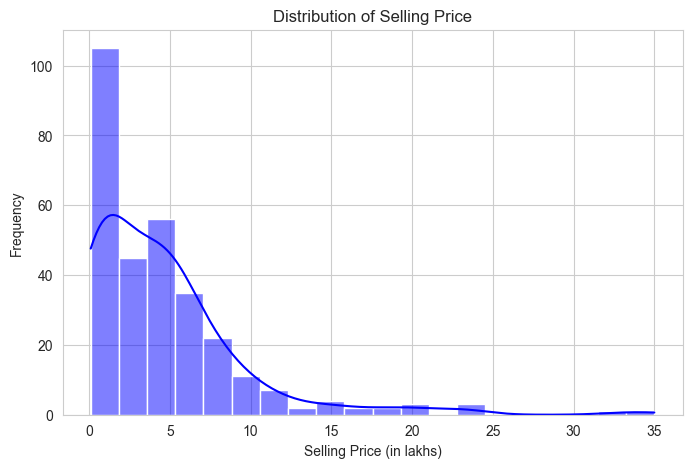

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set_style("whitegrid")

# Distribution of Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_car_data["selling_price"], bins=20, kde=True, color="blue")
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (in lakhs)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
Most cars are in the lower price range, with a right-skewed distribution.

### Fuel Type Distribution

C:\Users\Zone Tech\AppData\Local\Temp\ipykernel_15380\2207422108.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_car_data["fuel_type"], palette="viridis")


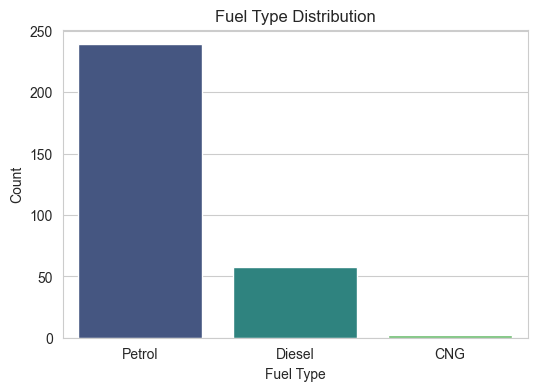

In [16]:
# Fuel Type Count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=cleaned_car_data["fuel_type"], palette="viridis")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

In [ ]:
Petrol cars dominate the dataset, followed by diesel and CNG.

### Transmission Type

C:\Users\Zone Tech\AppData\Local\Temp\ipykernel_15380\757044747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_car_data["transmission"], palette="pastel")


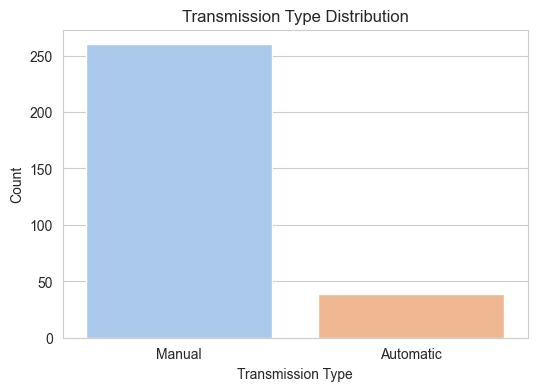

In [17]:
# Transmission Type Count
plt.figure(figsize=(6, 4))
sns.countplot(x=cleaned_car_data["transmission"], palette="pastel")
plt.title("Transmission Type Distribution")
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.show()

In [ ]:
Majority of the cars have manual transmission, while automatic cars are fewer.

## Distribution of driven kilometers

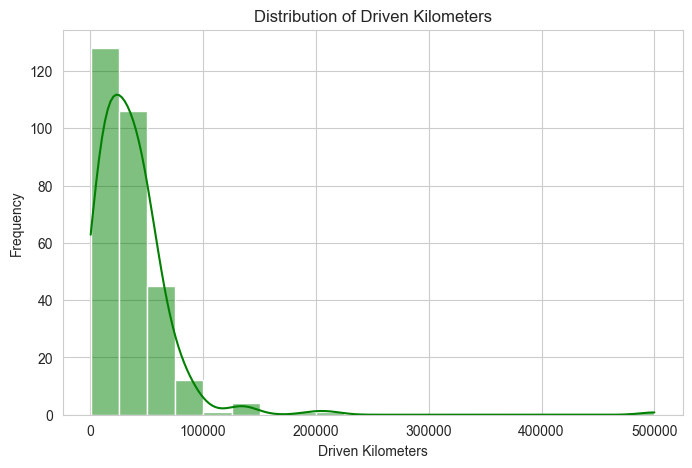

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Driven Kilometers
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_car_data["driven_km"], bins=20, kde=True, color="green")
plt.title("Distribution of Driven Kilometers")
plt.xlabel("Driven Kilometers")
plt.ylabel("Frequency")
plt.show()

## Scatter plot to visualize the relationship between selling price and driven kilometers.

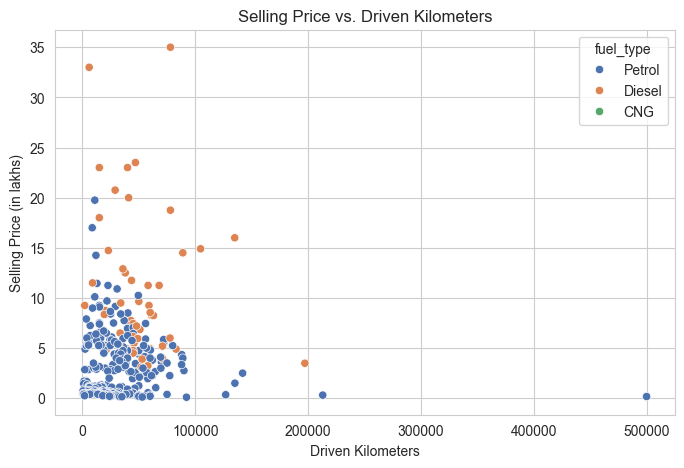

In [19]:
# Scatter plot of Selling Price vs. Driven Kilometers
plt.figure(figsize=(8, 5))
sns.scatterplot(x="driven_km", y="selling_price", data=cleaned_car_data, hue="fuel_type", palette="deep")
plt.title("Selling Price vs. Driven Kilometers")
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price (in lakhs)")
plt.show()

## Box plots to visualize the distribution of selling price by fuel type and transmission type.

C:\Users\Zone Tech\AppData\Local\Temp\ipykernel_15380\1497982570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="fuel_type", y="selling_price", data=cleaned_car_data, palette="coolwarm")


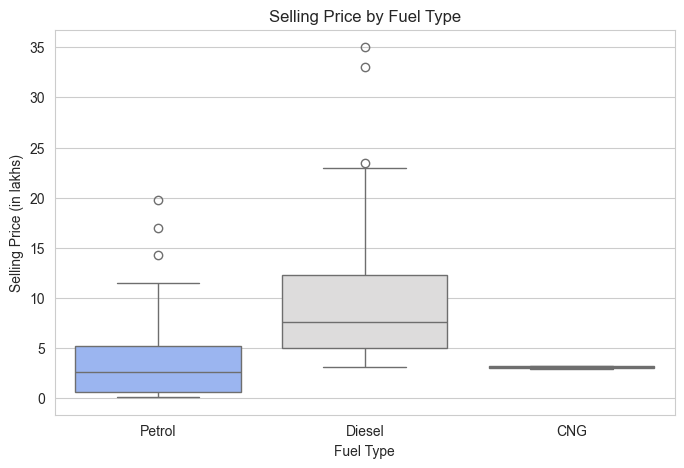

C:\Users\Zone Tech\AppData\Local\Temp\ipykernel_15380\1497982570.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="transmission", y="selling_price", data=cleaned_car_data, palette="coolwarm")


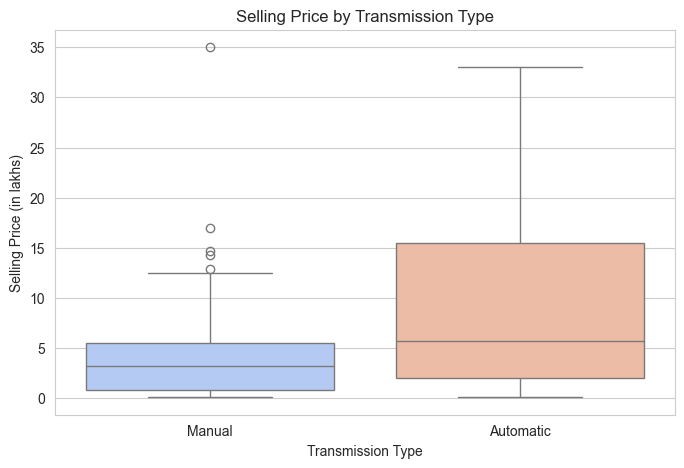

In [20]:
# Box plot of Selling Price by Fuel Type
plt.figure(figsize=(8, 5))
sns.boxplot(x="fuel_type", y="selling_price", data=cleaned_car_data, palette="coolwarm")
plt.title("Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price (in lakhs)")
plt.show()

# Box plot of Selling Price by Transmission Type
plt.figure(figsize=(8, 5))
sns.boxplot(x="transmission", y="selling_price", data=cleaned_car_data, palette="coolwarm")
plt.title("Selling Price by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price (in lakhs)")
plt.show()


## Feature Engineering

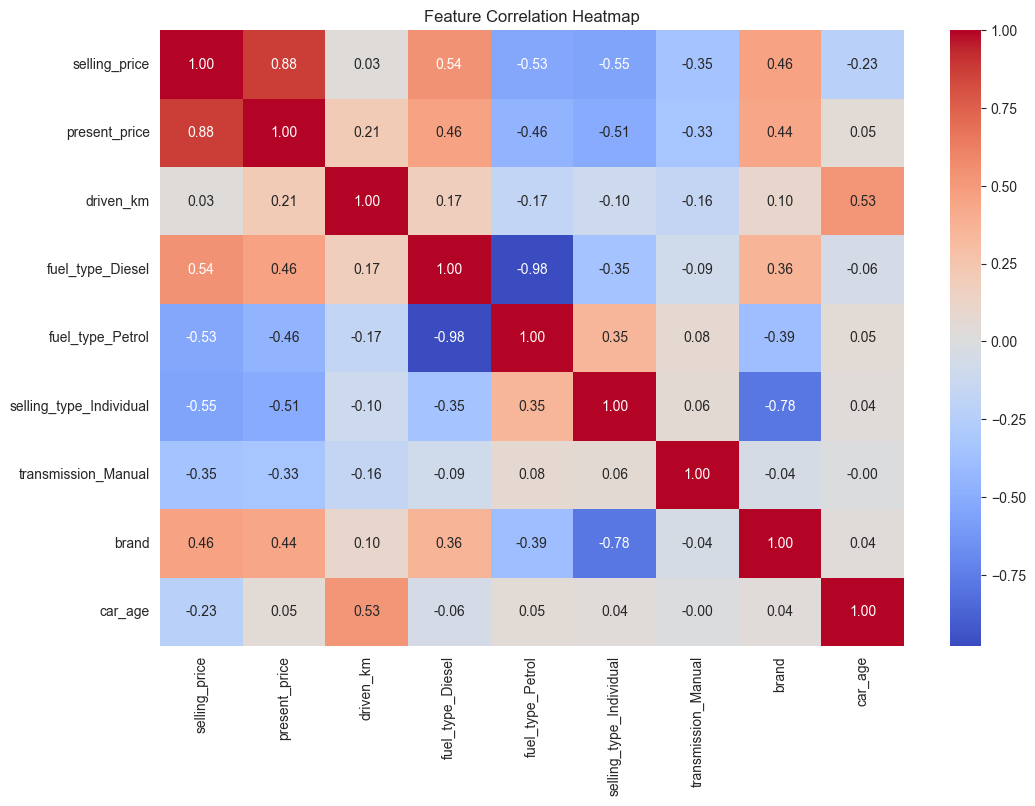

Feature Engineering & Scaling Completed 


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
cleaned_car_data = pd.read_csv("cleaned_car_data.csv")

# 1️ One-Hot Encoding for categorical variables
categorical_cols = ['fuel_type', 'selling_type', 'transmission']
cleaned_car_data = pd.get_dummies(cleaned_car_data, columns=categorical_cols, drop_first=True)

# 2️ Extract brand name (Assumption: First word in 'car_name' is the brand)
cleaned_car_data['brand'] = cleaned_car_data['car_name'].apply(lambda x: x.split()[0])
cleaned_car_data.drop(['car_name'], axis=1, inplace=True)

# Convert 'brand' to numeric codes
cleaned_car_data['brand'] = cleaned_car_data['brand'].astype('category').cat.codes  

# 3️ Create 'Car_Age' feature and drop 'year'
cleaned_car_data['car_age'] = 2024 - cleaned_car_data['year']
cleaned_car_data.drop(['year'], axis=1, inplace=True)

# 4️ Handle missing values (if any)
cleaned_car_data.dropna(inplace=True)  # Drop rows with missing values

# 5️ Feature Scaling (StandardScaler)
scaler = StandardScaler()
numerical_cols = cleaned_car_data.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('selling_price')  # Exclude target variable

cleaned_car_data[numerical_cols] = scaler.fit_transform(cleaned_car_data[numerical_cols])

# 6️ Generate a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_car_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 7️ Save the processed dataset
cleaned_car_data.to_csv("processed_car_data.csv", index=False)
print("Feature Engineering & Scaling Completed ")


In [ ]:
Description:
- Performed one-hot encoding for categorical variables.
- Extracted brand names from 'car_name' and convert them to numeric codes.
- Created a 'Car_Age' feature and drop the 'year' column.
- Handled missing values by dropping rows with any missing values.
- Scale numerical features using StandardScaler.
- Generated a correlation heatmap to visualize feature correlations.
- Saved the processed dataset for further analysis.

## Model Training and Evaluation

 Linear Regression: RMSE = 2.44, R² Score = 0.7687
 Random Forest: RMSE = 3.44, R² Score = 0.5409
 XGBoost: RMSE = 2.46, R² Score = 0.7661
 Support Vector Regression (SVR): RMSE = 3.04, R² Score = 0.6407


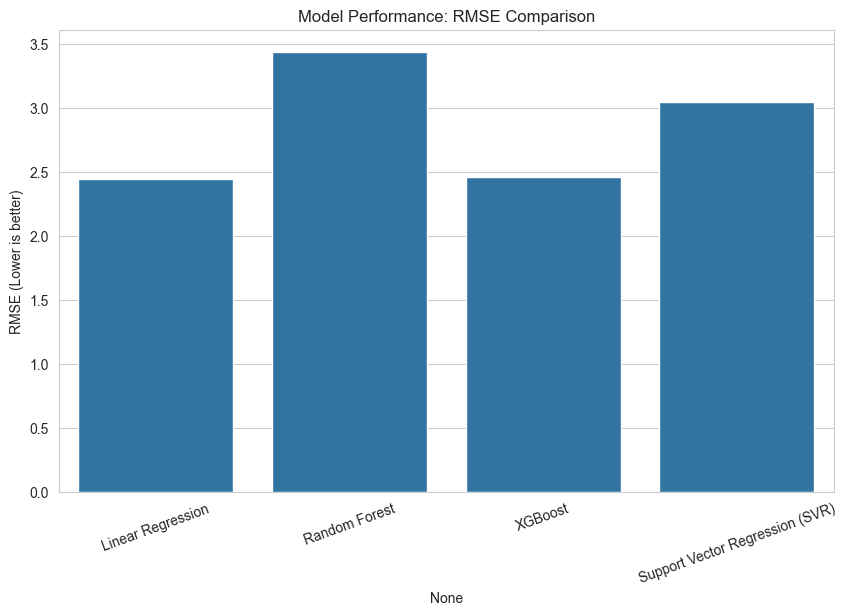

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Load preprocessed dataset
processed_car_data = pd.read_csv("processed_car_data.csv")

# Define features and target variable
X = processed_car_data.drop(columns=['selling_price'])  # Features
y = processed_car_data['selling_price']  # Target variable

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression (SVR)": SVR(kernel='rbf')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R² Score": r2}
    print(f" {name}: RMSE = {rmse:.2f}, R² Score = {r2:.4f}")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Plot model performance
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["RMSE"])
plt.title("Model Performance: RMSE Comparison")
plt.ylabel("RMSE (Lower is better)")
plt.xticks(rotation=20)
plt.show()


In [ ]:
Description:
- Displayed the performance results of each model.
- Linear Regression and XGBoost models show the best performance with the lowest RMSE and highest R² scores

## Hyperparameter Tuning

In [57]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter grids
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize models
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR()
lr = LinearRegression()

# Perform Grid Search for each model (using limited CV folds to speed up)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fit models on training data
xgb_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
svr_grid.fit(X_train, y_train)
lr.fit(X_train, y_train)  # No hyperparameter tuning for Linear Regression

# Get best parameters and scores
best_xgb = xgb_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_svr = svr_grid.best_estimator_

best_xgb_params = xgb_grid.best_params_
best_rf_params = rf_grid.best_params_
best_svr_params = svr_grid.best_params_

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

# Evaluate all models
xgb_rmse, xgb_r2 = evaluate_model(best_xgb, X_test, y_test)
rf_rmse, rf_r2 = evaluate_model(best_rf, X_test, y_test)
svr_rmse, svr_r2 = evaluate_model(best_svr, X_test, y_test)
lr_rmse, lr_r2 = evaluate_model(lr, X_test, y_test)  # Linear Regression results

# Store results
tuned_results = {
    'XGBoost': {'RMSE': xgb_rmse, 'R2': xgb_r2, 'Best Params': best_xgb_params},
    'Random Forest': {'RMSE': rf_rmse, 'R2': rf_r2, 'Best Params': best_rf_params},
    'SVR': {'RMSE': svr_rmse, 'R2': svr_r2, 'Best Params': best_svr_params},
    'Linear Regression': {'RMSE': lr_rmse, 'R2': lr_r2}  # No hyperparameters
}

tuned_results


C:\Users\Zone Tech\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Zone Tech\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Zone Tech\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Zone Tech\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated i

{'XGBoost': {'RMSE': np.float64(1.7977921396695737),
  'R2': 0.8745965276110464,
  'Best Params': {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}},
 'Random Forest': {'RMSE': np.float64(3.329754697828742),
  'R2': 0.5698151731000931,
  'Best Params': {'max_depth': 10, 'n_estimators': 200}},
 'SVR': {'RMSE': np.float64(2.6701557471450106),
  'R2': 0.7233671216108555,
  'Best Params': {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}},
 'Linear Regression': {'RMSE': np.float64(2.4417200682454046),
  'R2': 0.7686751160847698}}

In [ ]:
Description:
- Define hyperparameter grids for XGBoost, Random Forest, and SVR models.
- Perform Grid Search to find the best hyperparameters for each model.
- Evaluate the models using RMSE and R² score metrics.
- Store and display the tuned results.

## Model comparison using visuals

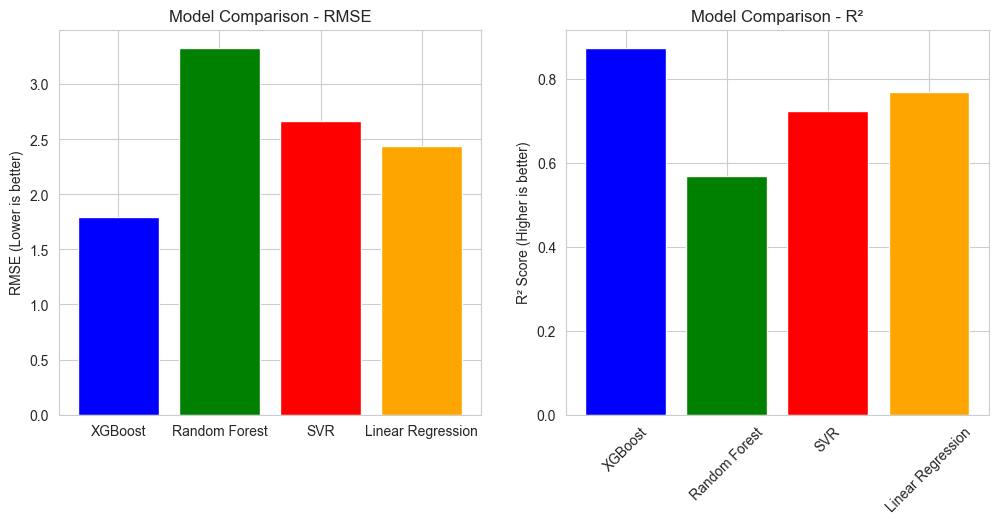

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting model names and their RMSE/R2 values
models = list(tuned_results.keys())
rmse_values = [tuned_results[model]['RMSE'] for model in models]
r2_values = [tuned_results[model]['R2'] for model in models]

# Create a bar plot for RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'orange'])
plt.ylabel('RMSE (Lower is better)')
plt.title('Model Comparison - RMSE')

# Create a bar plot for R²
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'red', 'orange'])
plt.ylabel('R² Score (Higher is better)')
plt.title('Model Comparison - R²')

plt.xticks(rotation=45)
plt.show()


In [ ]:
Description:
- Display the performance results of each model after hyperparameter tuning.
- XGBoost model shows the best performance with the lowest RMSE and highest R² score.

## Save and Load the Best Model

In [59]:
import joblib

# Save the best XGBoost model
joblib.dump(best_xgb, 'best_xgboost_model.pkl')

# To load the model later:
# loaded_model = joblib.load('best_xgboost_model.pkl')

['best_xgboost_model.pkl']

In [60]:
# Load the saved model
loaded_model = joblib.load('best_xgboost_model.pkl')

# Make predictions on test data
y_pred = loaded_model.predict(X_test)

# Display the first few predictions
print(y_pred[:10])

[8.865545   8.850115   0.49651363 7.209412   6.712669   4.7591243
 5.0171995  1.2998855  9.34799    0.27879208]


In [ ]:
Description:
- Save the best XGBoost model using joblib.
- Load the saved model and make predictions on test data.
- Display the first few predictions.

In [62]:
import pandas as pd

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save to CSV
predictions_df.to_csv('xgboost_predictions.csv', index=False)

## Analyze Prediction Errors

In [63]:
import pandas as pd

# Load predictions
df = pd.read_csv('xgboost_predictions.csv')

# Compute error metrics
df['Absolute Error'] = abs(df['Actual'] - df['Predicted'])
df['Squared Error'] = (df['Actual'] - df['Predicted']) ** 2

# Display first 10 rows
print(df.head(10))


   Actual  Predicted  Absolute Error  Squared Error
0    8.99   8.865545        0.124455       0.015489
1    8.35   8.850115        0.500115       0.250115
2    0.45   0.496514        0.046514       0.002164
3    7.45   7.209412        0.240588       0.057883
4    5.25   6.712669        1.462669       2.139401
5    5.25   4.759124        0.490876       0.240959
6    5.85   5.017200        0.832800       0.693557
7    1.15   1.299886        0.149886       0.022466
8    9.25   9.347990        0.097990       0.009602
9    0.38   0.278792        0.101208       0.010243


In [ ]:
Conclusion:
Overall Performance: The model performs well, as evidenced by the closeness of predicted values to actual values. The low absolute and squared errors further validate this.
Specific Cases: While most predictions are close to actual values, some instances (e.g., the fourth record) have higher errors, suggesting areas for potential model improvement.
The model is good at predicting car prices, with most predictions being very close to the actual prices. There are a few cases where predictions are a bit off, but overall, the model does a reliable job.

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute metrics
mae = mean_absolute_error(df['Actual'], df['Predicted'])
rmse = np.sqrt(mean_squared_error(df['Actual'], df['Predicted']))
r2 = r2_score(df['Actual'], df['Predicted'])

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')


MAE: 0.8446
RMSE: 1.7978
R²: 0.8746


 ## Visualize Actual vs. Predicted Values

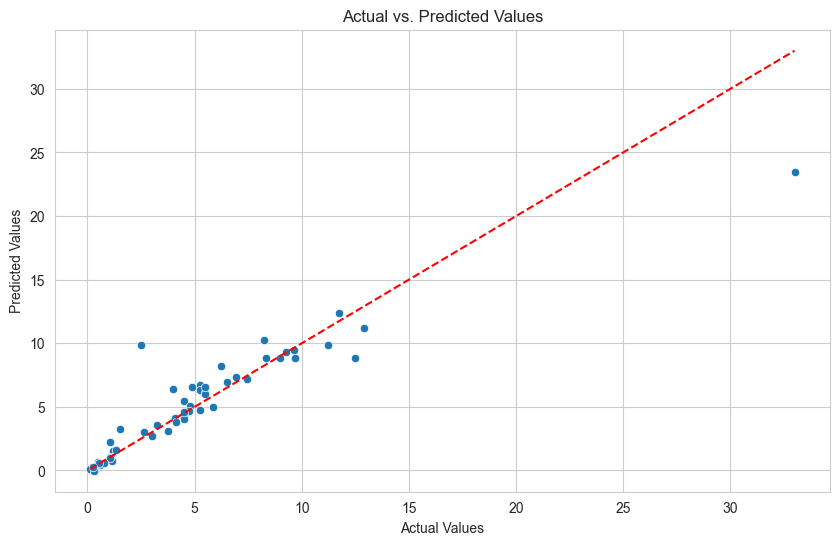

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load predictions
df = pd.read_csv('xgboost_predictions.csv')

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Actual'], y=df['Predicted'])
plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
Visual Result Analysis
The scatter plot illustrates that the predicted car prices closely align with the actual prices, with most points lying near the diagonal line, indicating accurate predictions. 

<Figure size 1200x600 with 0 Axes>

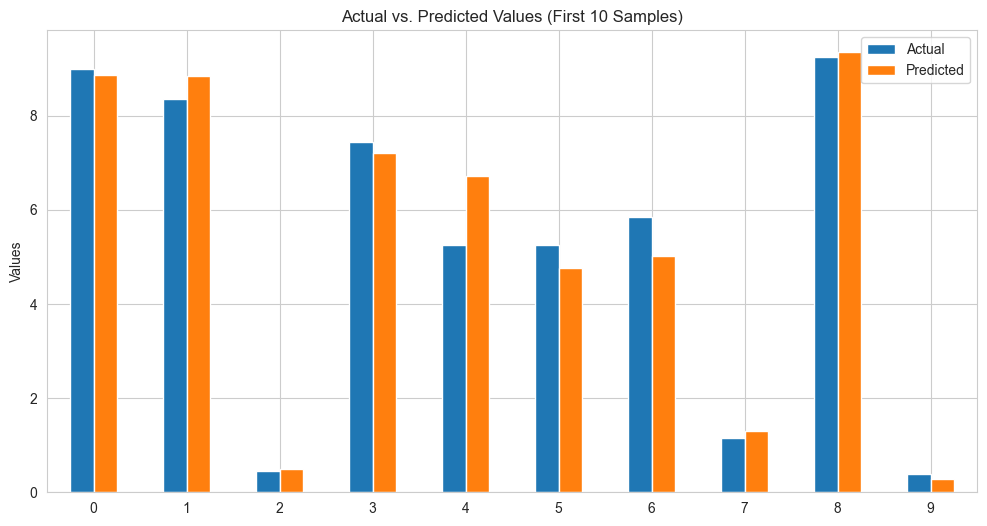

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of Actual vs. Predicted values for the first 10 samples
plt.figure(figsize=(12, 6))
samples = df.head(10)
samples.plot(kind='bar', figsize=(12, 6))
plt.xticks(range(len(samples)), samples.index, rotation=0)
plt.title('Actual vs. Predicted Values (First 10 Samples)')
plt.ylabel('Values')
plt.show()

In [ ]:
The bar chart further compares the first 10 samples, showing that the predicted values are very close to the actual values, highlighting the model's reliability and performance. Overall, the visualizations confirm that the model is effective in predicting car prices with a high degree of accuracy.